# Jarque-Bera test

**References:**
- https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test
- https://www.quantopian.com/posts/data-structures-for-financial-machine-learning

In [1]:
import scipy.stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/edy/lib/build/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
stdnorm = scipy.stats.norm(loc=0., scale=1.0) 

In [3]:
x = stdnorm.rvs(size=200000)

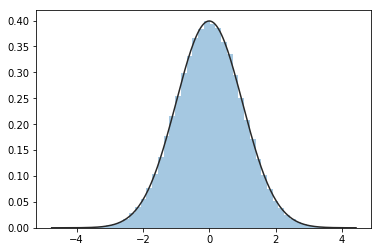

In [4]:
fig, ax = plt.subplots()
sns.distplot(x, fit=scipy.stats.norm, kde=False,ax=ax)

\begin{equation}
    b_{1}
    =
    \frac{m_{s}}{s^{3}}
    =
    \frac{ \frac{1}{n} \sum^{n}_{i} (x_{i} - \bar{x})^{3} }{  \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2} }^{3} }
\end{equation}

In [5]:
scipy.stats.skew(x)

-0.0020230611420162877

In [6]:
skew = np.mean(np.power(x-np.mean(x),3))/(np.var(x,ddof=1)**(3/2))
skew

-0.0020230459690766876

\begin{equation}
    g_{2}
    =
    \frac{\frac{1}{n} \sum_{i=1}^{n} (x_{i}-\bar{x})^{4}}{ \left(\frac{1}{n}\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}\right)^{2} }
\end{equation}

In [7]:
kurtosis = np.mean(np.power(x-np.mean(x),4))/(np.var(x,ddof=1)**2) - 3 
kurtosis

-0.000590090213286043

In [8]:
scipy.stats.kurtosis(x)

-0.0005600958892308938

\begin{equation}
    JB
    =
    \frac{n-k+1}{6}
    \left(
        S^{2}
        +
        \frac{1}{4}
        (C-3)^{3}
    \right)
\end{equation}

where

- $S$: is the sample skewness
- $C$: is the sample kurtosis

In [9]:
help(scipy.stats.jarque_bera)

Help on function jarque_bera in module scipy.stats.stats:

jarque_bera(x)
    Perform the Jarque-Bera goodness of fit test on sample data.
    
    The Jarque-Bera test tests whether the sample data has the skewness and
    kurtosis matching a normal distribution.
    
    Note that this test only works for a large enough number of data samples
    (>2000) as the test statistic asymptotically has a Chi-squared distribution
    with 2 degrees of freedom.
    
    Parameters
    ----------
    x : array_like
        Observations of a random variable.
    
    Returns
    -------
    jb_value : float
        The test statistic.
    p : float
        The p-value for the hypothesis test.
    
    References
    ----------
    .. [1] Jarque, C. and Bera, A. (1980) "Efficient tests for normality,
           homoscedasticity and serial independence of regression residuals",
           6 Econometric Letters 255-259.
    
    Examples
    --------
    >>> from scipy import stats
    >>> np.rando

In [10]:
scipy.stats.jarque_bera(x)

(0.1390401078539901, 0.9328414260631228)

In [11]:
x = scipy.stats.t.rvs(size=200000, df=10)

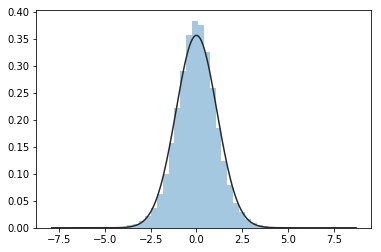

In [12]:
fig, ax = plt.subplots()
sns.distplot(x, fit=scipy.stats.norm, kde=False, ax=ax)

In [13]:
scipy.stats.jarque_bera(x)

(7632.580822908721, 0.0)